C:\Users\AMIT\Anaconda3\envs\venv-der\lib\site-packages\ipykernel_launcher.py:15: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  from ipykernel import kernelapp as app
C:\Users\AMIT\Anaconda3\envs\venv-der\lib\site-packages\ipykernel_launcher.py:16: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  app.launch_new_instance()


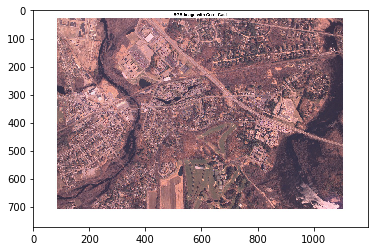

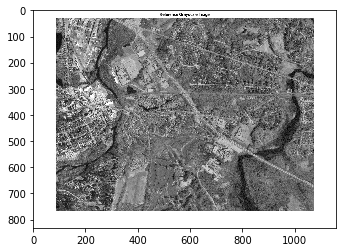

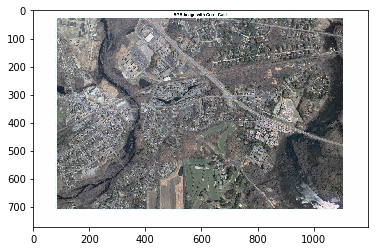

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

imsrc = np.asarray(Image.open("img2.jpeg"))
imtint = np.asarray(Image.open("img1.jpeg"))

nbr_bins=255
if len(imsrc.shape) < 3:
    imsrc = imsrc[:,:,np.newaxis]
    imtint = imtint[:,:,np.newaxis]

imres = imsrc.copy()
for d in range(imsrc.shape[2]):
    imhist,bins = np.histogram(imsrc[:,:,d].flatten(),nbr_bins,normed=True)
    tinthist,bins = np.histogram(imtint[:,:,d].flatten(),nbr_bins,normed=True)

    cdfsrc = imhist.cumsum() #cumulative distribution function
    cdfsrc = (255 * cdfsrc / cdfsrc[-1]).astype(np.uint8) #normalize

    cdftint = tinthist.cumsum() #cumulative distribution function
    cdftint = (255 * cdftint / cdftint[-1]).astype(np.uint8) #normalize


    im2 = np.interp(imsrc[:,:,d].flatten(),bins[:-1],cdfsrc)



    im3 = np.interp(im2,cdftint, bins[:-1])

    imres[:,:,d] = im3.reshape((imsrc.shape[0],imsrc.shape[1] ))

im = plt.imshow(imsrc)
plt.show()
im = plt.imshow(imtint)
plt.show()
im = plt.imshow(imres)
plt.show()
